Line-Based Precision

In [1]:
# 已知数据
data = [
    {'project': 'duckdb', 'total_diff_lines': 17246, 'total_merged_lines': 21876, 'total_mergebot_lines': 36515},
    {'project': 'frameworks_av', 'total_diff_lines': 11599, 'total_merged_lines': 44813, 'total_mergebot_lines': 35030},
    {'project': 'libnativehelper', 'total_diff_lines': 105, 'total_merged_lines': 934, 'total_mergebot_lines': 967},
    {'project': 'flameshot', 'total_diff_lines': 112, 'total_merged_lines': 5394, 'total_mergebot_lines': 5439},
    {'project': 'tmux', 'total_diff_lines': 1785, 'total_merged_lines': 45097, 'total_mergebot_lines': 41734},
    {'project': 'redis', 'total_diff_lines': 5394, 'total_merged_lines': 78076, 'total_mergebot_lines': 82473},
    {'project': 'frameworks_native', 'total_diff_lines': 22509, 'total_merged_lines': 81794, 'total_mergebot_lines': 76245},
    {'project': 'rocksdb', 'total_diff_lines': 13516, 'total_merged_lines': 88134, 'total_mergebot_lines': 90464},
    {'project': 'grpc', 'total_diff_lines': 20042, 'total_merged_lines': 29907, 'total_mergebot_lines': 40404},
    {'project': 'art', 'total_diff_lines': 23900, 'total_merged_lines': 52765, 'total_mergebot_lines': 64854}
]

# 计算总的Precision和Recall
total_mergebot_lines_sum = sum(item['total_mergebot_lines'] for item in data)
total_diff_lines_sum = sum(item['total_diff_lines'] for item in data)
total_merged_lines_sum = sum(item['total_merged_lines'] for item in data)

total_precision = (total_mergebot_lines_sum - total_diff_lines_sum) / total_mergebot_lines_sum
total_recall = (total_mergebot_lines_sum - total_diff_lines_sum) / total_merged_lines_sum

print(f"Total Precision: {total_precision:.2%}")
print(f"Total Recall: {total_recall:.2%}")

Total Precision: 75.49%
Total Recall: 79.75%


Block-Based Precision

In [3]:
import pandas as pd

# 创建初始数据
data = {
    '项目名': ['rocksdb', 'grpc', 'frameworks_av', 'frameworks_native', 'libnativehelper'],
    '正确解决': [54.90, 51.51, 42.03, 47.17, 53.60],
    '减小冲突区域': [13.24, 8.58, 11.59, 12.74, 16.49],
    '给出错误的解决方案': [16.67, 20.70, 18.37, 18.40, 14.43],
    '不处理': [15.19, 19.21, 28.01, 21.69, 15.48],
    '冲突块总数目': [204, 198, 207, 212, 97]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 计算各个栏的总计值
total_correct = round(sum(df['冲突块总数目'] * df['正确解决'] / 100))
total_reduce_conflict = round(sum(df['冲突块总数目'] * df['减小冲突区域'] / 100))
total_wrong_solution = round(sum(df['冲突块总数目'] * df['给出错误的解决方案'] / 100))
total_no_action = round(sum(df['冲突块总数目'] * df['不处理'] / 100))
total_conflict_blocks = df['冲突块总数目'].sum()

# 添加总计行
total_row = pd.DataFrame({
    '项目名': ['总计'],
    '正确解决': [total_correct],
    '减小冲突区域': [total_reduce_conflict],
    '给出错误的解决方案': [total_wrong_solution],
    '不处理': [total_no_action],
    '冲突块总数目': [total_conflict_blocks]
})

# 计算总计的比例
total_correct_percent = round(total_correct / total_conflict_blocks * 100, 2)
total_reduce_conflict_percent = round(total_reduce_conflict / total_conflict_blocks * 100, 2)
total_wrong_solution_percent = round(total_wrong_solution / total_conflict_blocks * 100, 2)
total_no_action_percent = round(total_no_action / total_conflict_blocks * 100, 2)

# 添加总计（比例）行
total_percent_row = pd.DataFrame({
    '项目名': ['总计（比例）'],
    '正确解决': [f'{total_correct_percent}%'],
    '减小冲突区域': [f'{total_reduce_conflict_percent}%'],
    '给出错误的解决方案': [f'{total_wrong_solution_percent}%'],
    '不处理': [f'{total_no_action_percent}%'],
    '冲突块总数目': ['']
})

# 将总计行和总计（比例）行追加到DataFrame
df = pd.concat([df, total_row, total_percent_row], ignore_index=True)

print(df)


                 项目名    正确解决  减小冲突区域 给出错误的解决方案     不处理 冲突块总数目
0            rocksdb    54.9   13.24     16.67   15.19    204
1               grpc   51.51    8.58      20.7   19.21    198
2      frameworks_av   42.03   11.59     18.37   28.01    207
3  frameworks_native   47.17   12.74      18.4   21.69    212
4    libnativehelper    53.6   16.49     14.43   15.48     97
5                 总计     453     111       166     188    918
6             总计（比例）  49.35%  12.09%    18.08%  20.48%       


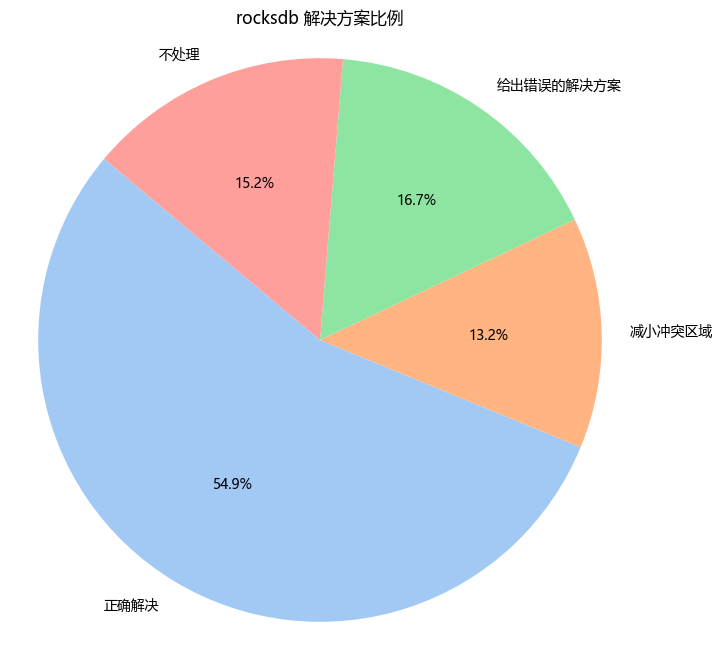

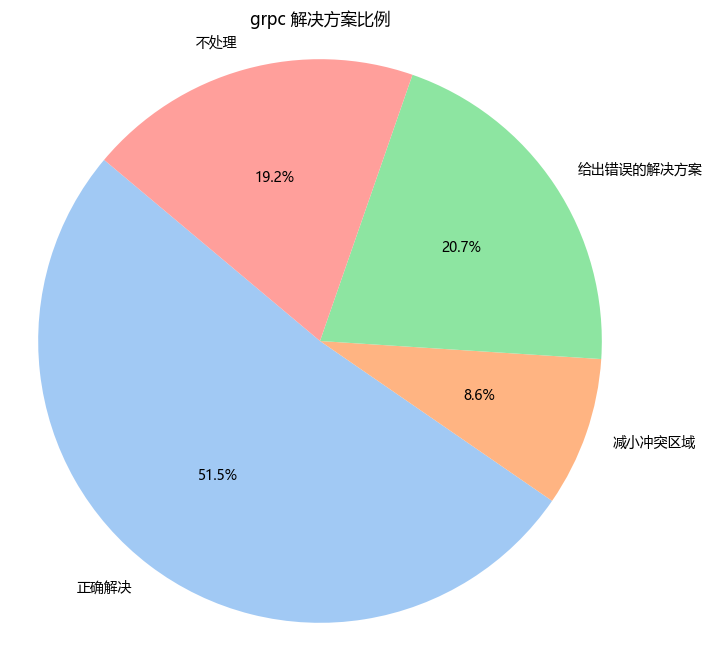

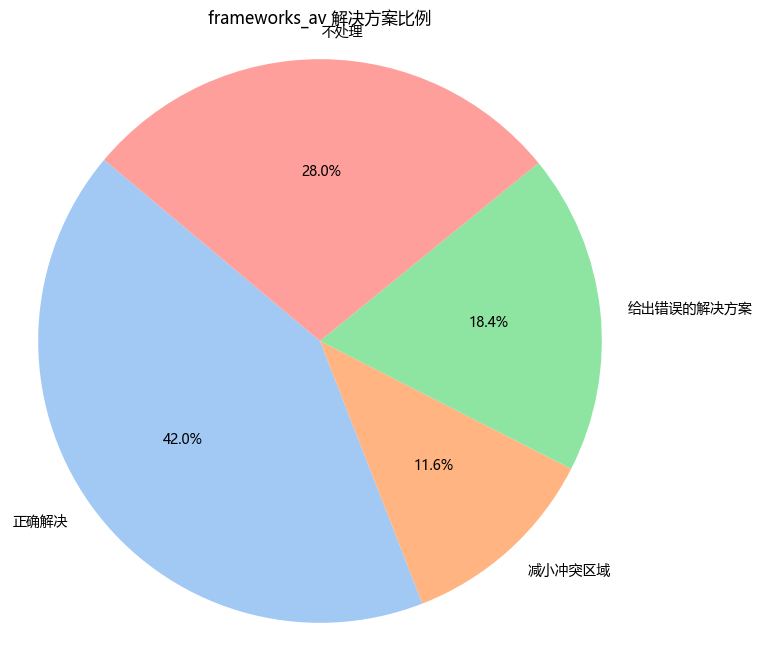

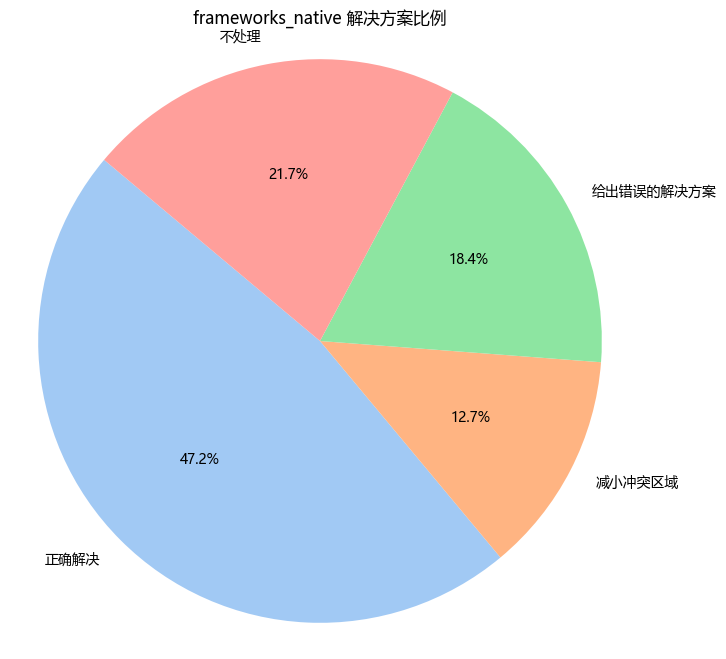

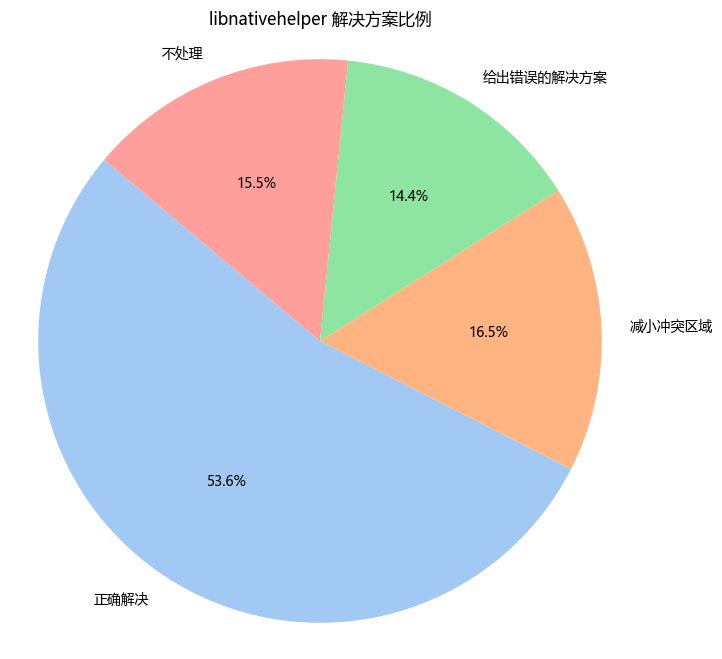

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 数据
data = {
    '项目名': ['rocksdb', 'grpc', 'frameworks_av', 'frameworks_native', 'libnativehelper'],
    '正确解决': [54.90, 51.51, 42.03, 47.17, 53.60],
    '减小冲突区域': [13.24, 8.58, 11.59, 12.74, 16.49],
    '给出错误的解决方案': [16.67, 20.70, 18.37, 18.40, 14.43],
    '不处理': [15.19, 19.21, 28.01, 21.69, 15.48],
    '冲突块总数目': [204, 198, 207, 212, 97]
}

# 设置浅色调的颜色
colors = sns.color_palette("pastel")

# 绘制饼状图
for i in range(len(data['项目名'])):
    project = data['项目名'][i]
    solutions = ['正确解决', '减小冲突区域', '给出错误的解决方案', '不处理']
    percentages = [data[solution][i] for solution in solutions]
    
    # 绘图
    plt.figure(figsize=(8, 8))
    plt.pie(percentages, labels=solutions, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'{project} 解决方案比例')
    plt.axis('equal')  # 使饼状图保持圆形
    plt.show()


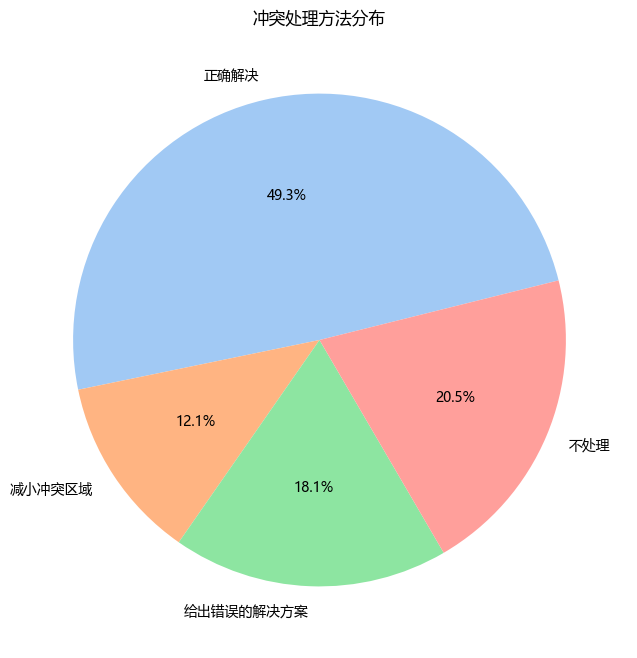

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# 数据
categories = ['正确解决', '减小冲突区域', '给出错误的解决方案', '不处理']
numbers = [453, 111, 166, 188]

colors = sns.color_palette("pastel")

# 创建饼状图
plt.figure(figsize=(8, 8))  # 设置图表大小
plt.pie(numbers, labels=categories, autopct='%1.1f%%', startangle=14, colors=colors)
plt.title('冲突处理方法分布')

# 显示图表
plt.show()



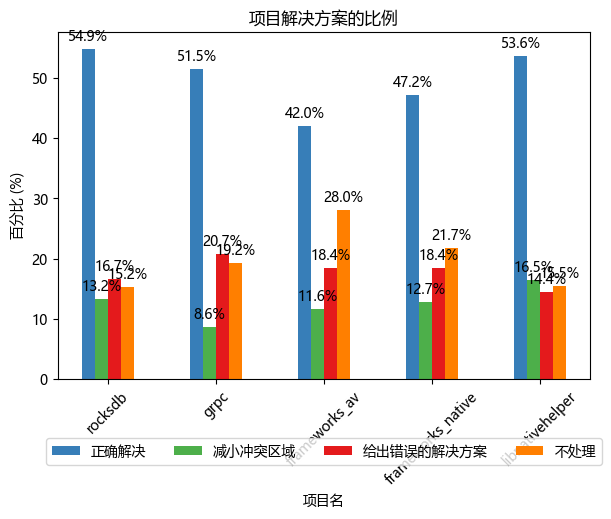

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
data = {
    '项目名': ['rocksdb', 'grpc', 'frameworks_av', 'frameworks_native', 'libnativehelper'],
    '正确解决': [54.90, 51.51, 42.03, 47.17, 53.60],
    '减小冲突区域': [13.24, 8.58, 11.59, 12.74, 16.49],
    '给出错误的解决方案': [16.67, 20.70, 18.37, 18.40, 14.43],
    '不处理': [15.19, 19.21, 28.01, 21.69, 15.48],
}

项目名 = data['项目名']
正确解决 = np.array(data['正确解决'])
减小冲突区域 = np.array(data['减小冲突区域'])
给出错误的解决方案 = np.array(data['给出错误的解决方案'])
不处理 = np.array(data['不处理'])

ind = np.arange(len(项目名))  # 组的x坐标
width = 0.12  # 缩小柱体的宽度，减少标签遮挡

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width*1.5, 正确解决, width, label='正确解决', color='#377eb8')
rects2 = ax.bar(ind - width/2, 减小冲突区域, width, label='减小冲突区域', color='#4daf4a')
rects3 = ax.bar(ind + width/2, 给出错误的解决方案, width, label='给出错误的解决方案', color='#e41a1c')
rects4 = ax.bar(ind + width*1.5, 不处理, width, label='不处理', color='#ff7f00')

# 添加文本、标签、标题和自定义x轴刻度标签
ax.set_xlabel('项目名')
ax.set_ylabel('百分比 (%)')
ax.set_title('项目解决方案的比例')
ax.set_xticks(ind)
ax.set_xticklabels(项目名, rotation=45)

# 移动图例的位置到底部中间
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=4)

def autolabel(rects):
    """在每个柱子旁边添加一个文本标签，显示其高度，避免遮挡。"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.1f%%' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3点垂直偏移
                    textcoords="offset points",
                    ha='center', va='bottom')

# 调用autolabel函数为每组柱子添加数值标签
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
# 由于图例被移到了外面，需要调整布局以确保图例完整显示
plt.subplots_adjust(bottom=0.2)

plt.show()